# *1. Import Librarires*

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# *2. Reading & Exploring The Dataset*

In [149]:
df = pd.read_csv('heart.csv')
df.shape

(310, 14)

In [150]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233,1.0,0.0,150.0,0,2.3,0,0.0,1.0,1
1,37.0,1.0,2.0,130.0,250,0.0,1.0,187.0,0,3.5,0,0.0,2.0,1
2,41.0,0.0,1.0,130.0,204,0.0,0.0,172.0,0,1.4,2,0.0,2.0,1
3,56.0,1.0,1.0,120.0,236,0.0,1.0,178.0,0,0.8,2,0.0,2.0,1
4,NaN,0.0,0.0,120.0,354,0.0,1.0,163.0,1,0.6,2,0.0,2.0,1
5,57.0,1.0,0.0,140.0,192,0.0,1.0,148.0,0,0.4,1,0.0,1.0,1
6,56.0,0.0,1.0,140.0,294,0.0,0.0,153.0,0,1.3,1,0.0,2.0,1
7,44.0,1.0,1.0,120.0,NaN,0.0,1.0,173.0,0,0.0,2,0.0,3.0,1
8,52.0,1.0,2.0,172.0,199,1.0,1.0,162.0,0,0.5,2,0.0,3.0,1
9,57.0,1.0,2.0,150.0,168,0.0,1.0,174.0,0,1.6,2,0.0,2.0,1


In [151]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68.0,1.0,0.0,144.0,193,1.0,1.0,141.0,0,3.4,1,2.0,3.0,0
301,57.0,1.0,0.0,130.0,131,0.0,1.0,115.0,1,1.2,1,1.0,3.0,0
302,57.0,0.0,1.0,130.0,236,0.0,0.0,174.0,0,0.0,1,1.0,2.0,0
303,66.0,0.0,3.0,150.0,226,0.0,1.0,114.0,0,2.6,0,0.0,2.0,1
304,43.0,1.0,0.0,150.0,247,0.0,1.0,171.0,0,1.5,2,0.0,2.0,1
305,69.0,0.0,3.0,140.0,239,0.0,1.0,151.0,0,1.8,2,2.0,2.0,1
306,41.0,0.0,1.0,130.0,204,0.0,0.0,172.0,0,1.4,2,0.0,2.0,1
307,56.0,1.0,1.0,120.0,236,0.0,1.0,178.0,0,0.8,2,0.0,2.0,1
308,NaN,0.0,0.0,120.0,354,0.0,1.0,163.0,1,0.6,2,0.0,2.0,1
309,57.0,1.0,0.0,140.0,192,0.0,1.0,148.0,0,0.4,1,0.0,1.0,1


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       307 non-null    float64
 1   sex       309 non-null    float64
 2   cp        309 non-null    float64
 3   trestbps  308 non-null    float64
 4   chol      305 non-null    object 
 5   fbs       307 non-null    float64
 6   restecg   309 non-null    float64
 7   thalach   307 non-null    float64
 8   exang     310 non-null    int64  
 9   oldpeak   309 non-null    float64
 10  slope     310 non-null    int64  
 11  ca        308 non-null    float64
 12  thal      308 non-null    float64
 13  target    310 non-null    int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 34.0+ KB


# *3. Preprocessing*

## *- Check & Handle Duplicated*

In [153]:
df.duplicated().sum()

np.int64(8)

In [154]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [155]:
df.isnull().sum()

age         2
sex         1
cp          1
trestbps    2
chol        5
fbs         3
restecg     1
thalach     3
exang       0
oldpeak     1
slope       0
ca          2
thal        2
target      0
dtype: int64

In [156]:
df['chol'].unique()

array(['233', '250', '204', '236', '354', '192', '294', nan, '199', '168',
       '239', '275', '266', '211', '283', '219', '340', '226', '247',
       '234', '243', '302', '212', '175', '417', '197', '198', '177',
       '273', '213', '304', '232', '269', '360', '308', '245', '208',
       '264', '321', '325', '235', '257', '256', '231', '141', '252',
       '201', '222', '260', '182', '303', '265', '309', '186', '203',
       '183', '220', '209', '258', '227', '261', '221', '205', '240',
       '318', '298', '564', '277', '214', '248', '255', '207', '223',
       '288', '160', '394', '315', '244', '270', '195', '196', '254',
       '126', '313', '262', '215', '193', '271', '268', '267', '210',
       'twenty', '295', '306', '178', '263', '242', '180', '228', 'ss',
       '278', '253', '342', '157', '286', '229', '284', '224', '206',
       '167', '230', '335', '276', '353', '225', '330', '290', '172',
       '305', '216', '188', '282', '185', '326', '274', '164', '307',
       '249',

In [157]:
col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'oldpeak']

for column_name in col:
    display(df[column_name].unique())


array([ 1.,  0., nan])

array([ 3.,  2.,  1.,  0., nan])

array([ 1.,  0., nan])

array([ 0.,  1., nan,  2.])

array([0, 1])

array([0, 2, 1])

array([ 0.,  2.,  1.,  3.,  4., nan])

array([ 1.,  2.,  3.,  0., nan])

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, nan, 6.2, 4. , 5.6, 2.9, 2.1,
       3.8, 4.4])

## *- Handle Incorrect Format*

In [108]:
df['chol'].replace('twenty', 20)
df['chol'].replace('ss', 228) #Backforward replacement
df['chol'] = pd.to_numeric(df['chol'], errors='coerce')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       300 non-null    float64
 1   sex       301 non-null    float64
 2   cp        301 non-null    float64
 3   trestbps  300 non-null    float64
 4   chol      295 non-null    float64
 5   fbs       299 non-null    float64
 6   restecg   301 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        300 non-null    float64
 12  thal      300 non-null    float64
 13  target    302 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 35.4 KB


## *- Handle NULL Values*

In [110]:
median_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
mode_cols = ['sex', 'cp', 'fbs', 'restecg', 'ca', 'thal']

for col in median_cols:
    if df[col].isnull().any(): # Check if there are any NaNs to avoid unnecessary computation
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

for col in mode_cols:
    if df[col].isnull().any(): # Check if there are any NaNs
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [112]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [113]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.403974,0.685430,0.960265,131.625828,246.579470,0.145695,0.526490,149.500000,0.327815,1.036424,1.397351,0.705298,2.307947,0.543046
std,9.044503,0.465115,1.033530,17.558513,51.158655,0.353386,0.526027,22.850336,0.470196,1.157095,0.616274,0.999620,0.610976,0.498970
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,165.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## *- Checking & Handle Outliers*

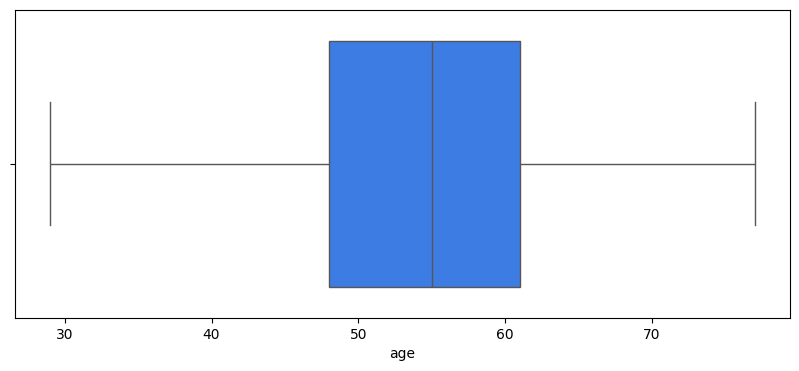

In [114]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='age', data=df, color='#2176ff')
plt.show()

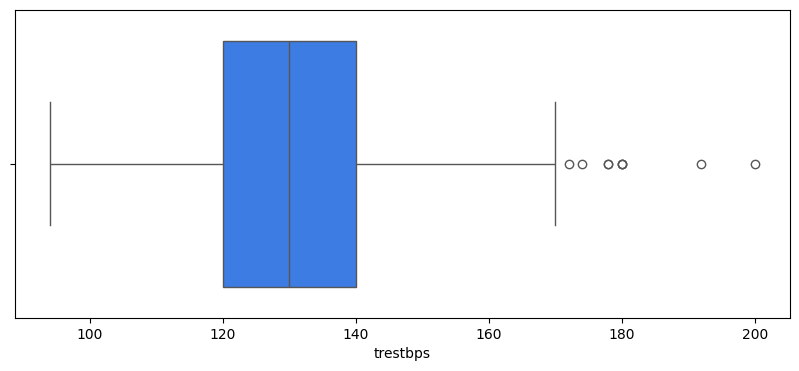

In [115]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='trestbps', data=df, color='#2176ff')
plt.show()

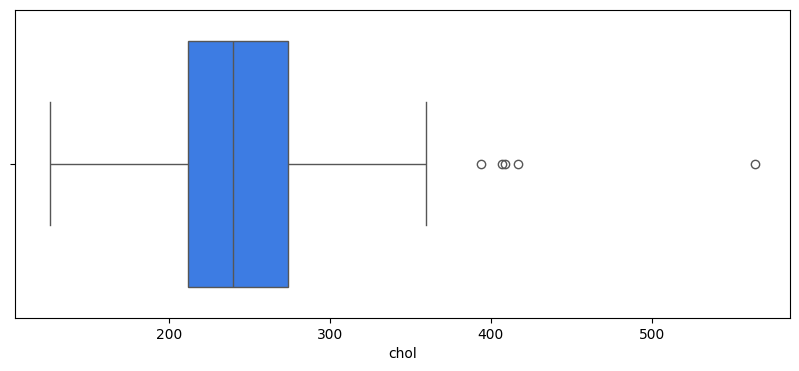

In [116]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='chol', data=df, color='#2176ff')
plt.show()

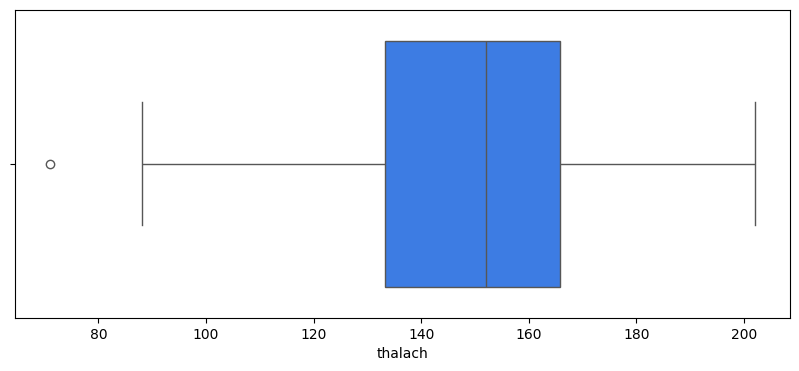

In [117]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='thalach', data=df, color='#2176ff')
plt.show()

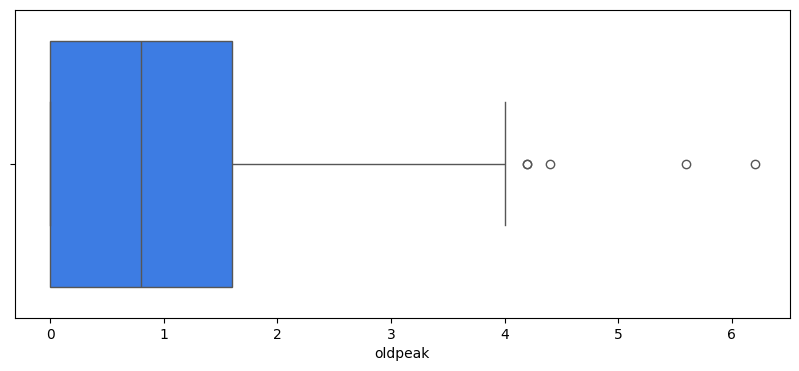

In [118]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='oldpeak', data=df, color='#2176ff')
plt.show()

In [119]:
def winsorize_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside bounds
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

In [120]:
outlier_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df = winsorize_iqr(df, outlier_cols)

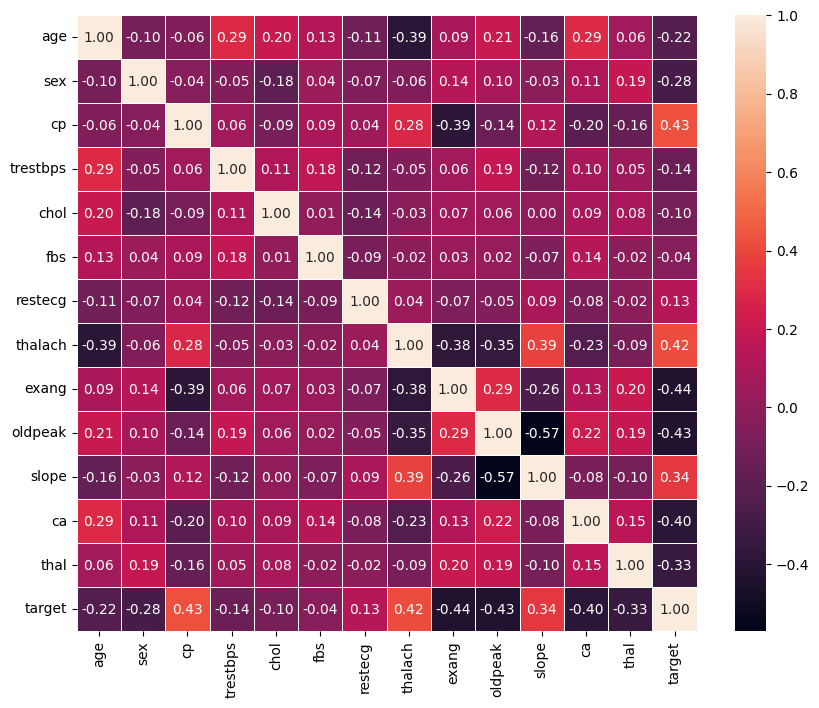

In [121]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.show()

# *4. Modeling*

In [122]:
X=df.drop('target',axis=1)
y=df['target']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [124]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## *Logistic Regression*

In [125]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

In [126]:
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f} %")
print(f"Test Accuracy: {test_accuracy * 100:.2f} %")

Training Accuracy: 86.28 %
Test Accuracy: 85.53 %


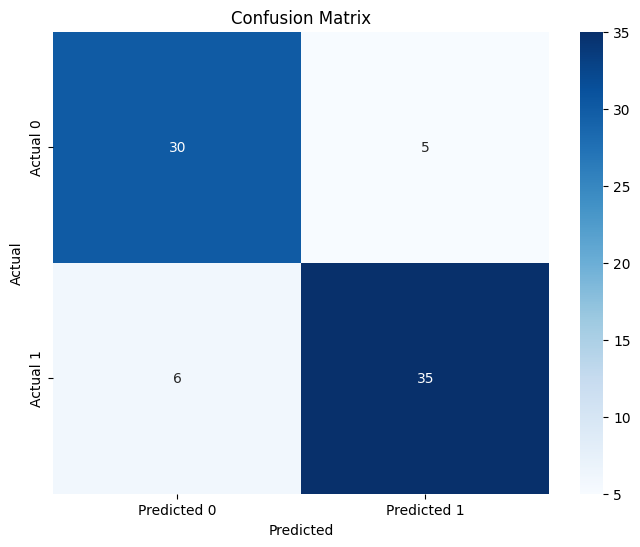

In [127]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [128]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.88      0.85      0.86        41

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76



## *KNN*

In [129]:
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

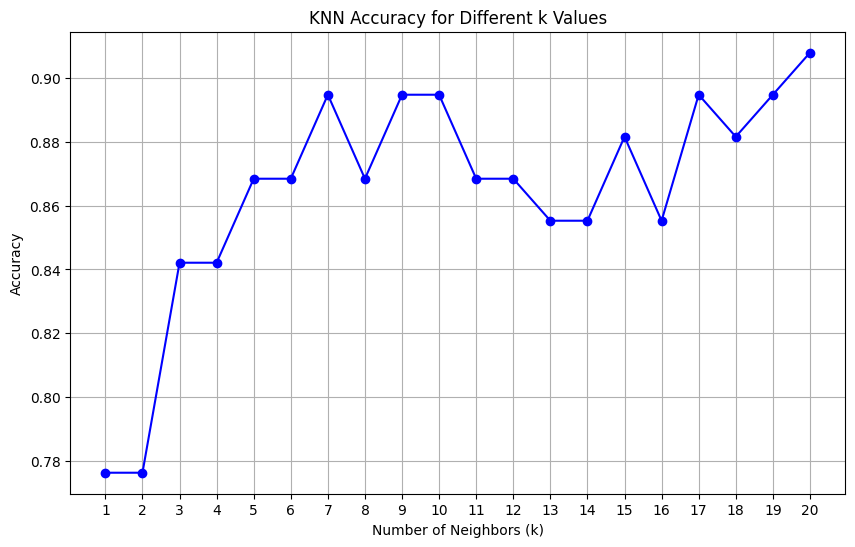

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', color='b')
plt.xticks(k_values)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.grid(True)
plt.show()

In [131]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy * 100:.2f} %")
print(f"Test Accuracy: {test_accuracy * 100:.2f} %")


Train Accuracy: 86.28 %
Test Accuracy: 89.47 %


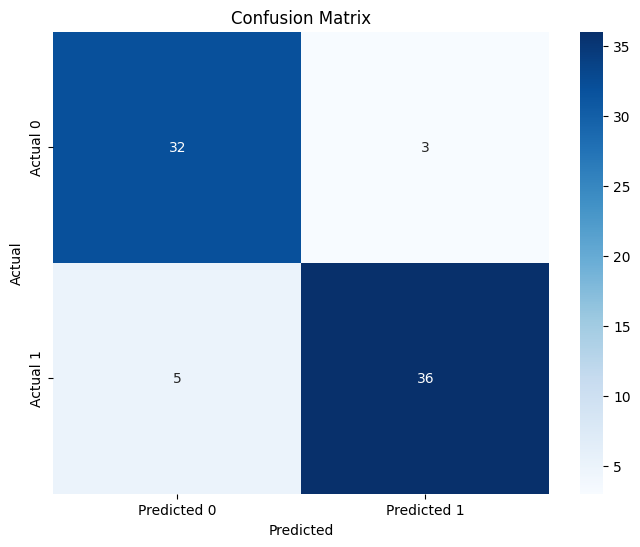

In [132]:
knn_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [133]:
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        35
           1       0.92      0.88      0.90        41

    accuracy                           0.89        76
   macro avg       0.89      0.90      0.89        76
weighted avg       0.90      0.89      0.89        76



## *Decision Tree*

In [134]:
dt_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    max_leaf_nodes=10,
    random_state=42) # Apply pre-pruning

In [135]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

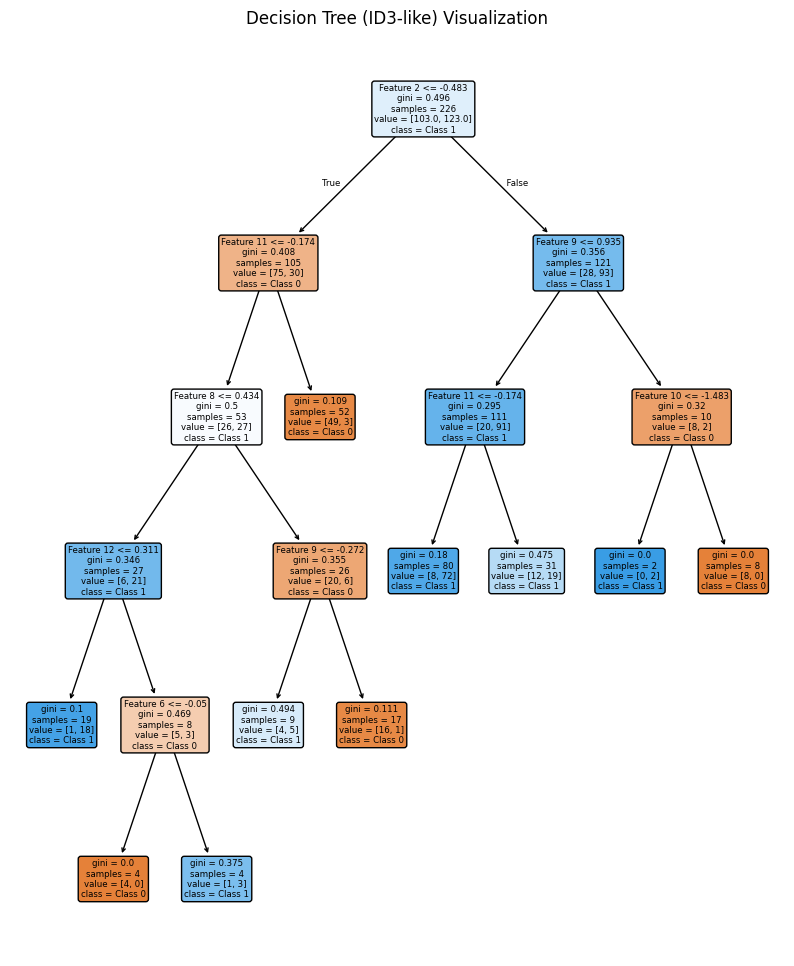

In [136]:
plt.figure(figsize=(10, 12))
plot_tree(dt_clf, filled=True, feature_names=
          [f"Feature {i}" for i in range(X.shape[1])],
          class_names=['Class 0', 'Class 1'], rounded=True)
plt.title("Decision Tree (ID3-like) Visualization")
plt.show()

In [137]:
y_pred = dt_clf.predict(X_test)

In [138]:
y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f} %")
print(f"Test Accuracy: {test_accuracy * 100:.2f} %")

Training Accuracy: 86.73 %
Test Accuracy: 85.53 %


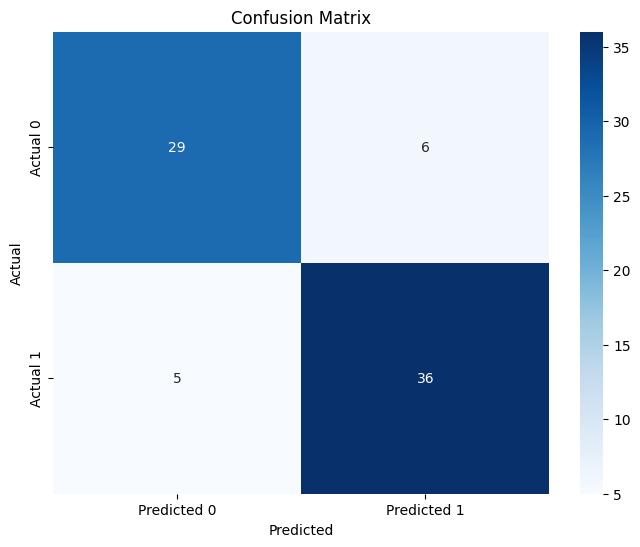

In [139]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [140]:
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



## *Random Forest*

In [141]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [142]:
y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8552631578947368
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.88      0.85      0.86        41

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76



## *SVM*

In [143]:
svm_model = SVC(kernel='linear')  

svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [144]:
y_pred = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)

testAcc = accuracy_score(y_test, y_pred)
trainAcc = accuracy_score(y_train, y_pred_train)

print(f"Train Accuracy: {trainAcc * 100:.2f} %")
print(f"Test Accuracy: {testAcc * 100:.2f} %")

Train Accuracy: 87.61 %
Test Accuracy: 84.21 %


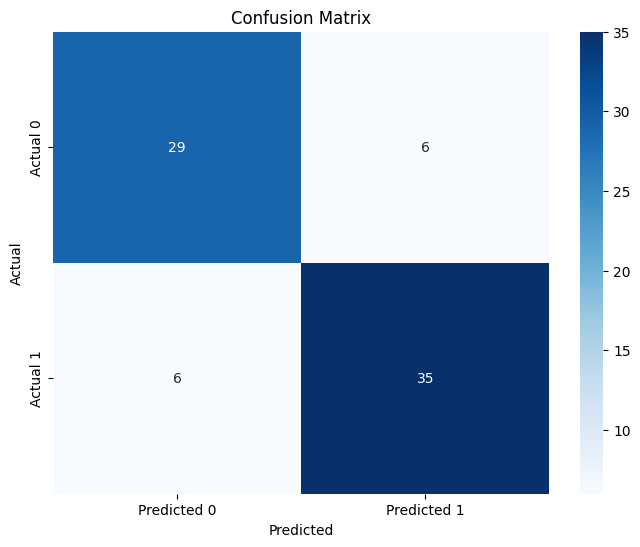

In [145]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [146]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.85      0.85      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



# *Logistic Regression from Scratch*

# *Deployment phase*

In [147]:
import pickle

models = {
    'SVM' : svm_model,
    'DecisionTree' : dt_clf,
    'RandomForest' : rf_classifier,
    'LogisticRegression' : log_reg,
    'KNN' : knn
}
scaler = sc

# Save each model to a separate .pkl file
for name, model in models.items():
    with open(f'{name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)